In [57]:
import pandas as pd
import matplotlib.pyplot as plt
dataset = pandas.read_csv('bitcoin_ticker.csv', engine='python', skipfooter=3)
#dataset = dataset[dataset['rpt_key'] == "btc_krw"]['bid']
#dataset.reshape(len(dataset),1)
#plt.plot(dataset)
#plt.show()


           date_id          datetime_id  market  rpt_key       last  \
382562  2017-06-27  2017-06-27 13:36:00  korbit  btc_krw  3164500.0   
382572  2017-06-27  2017-06-27 13:37:00  korbit  btc_krw  3166000.0   
382582  2017-06-27  2017-06-27 13:38:00  korbit  btc_krw  3169000.0   
382592  2017-06-27  2017-06-27 13:39:00  korbit  btc_krw  3158000.0   
382602  2017-06-27  2017-06-27 13:40:00  korbit  btc_krw  3152000.0   
382612  2017-06-27  2017-06-27 13:41:00  korbit  btc_krw  3153000.0   
382622  2017-06-27  2017-06-27 13:42:00  korbit  btc_krw  3157500.0   
382632  2017-06-27  2017-06-27 13:43:00  korbit  btc_krw  3168500.0   
382642  2017-06-27  2017-06-27 13:44:00  korbit  btc_krw  3169000.0   
382652  2017-06-27  2017-06-27 13:45:00  korbit  btc_krw  3170000.0   
382662  2017-06-27  2017-06-27 13:46:00  korbit  btc_krw  3169500.0   
382672  2017-06-27  2017-06-27 13:47:00  korbit  btc_krw  3165500.0   
382682  2017-06-27  2017-06-27 13:48:00  korbit  btc_krw  3169000.0   
382692

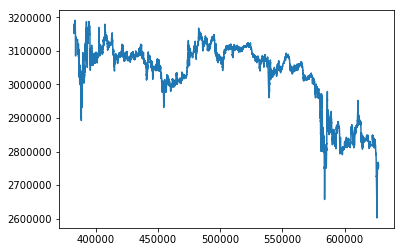

In [63]:
dataset_new = dataset[dataset['date_id']>='2017-06-27']

dataset_new = dataset_new[ dataset_new['rpt_key'] == "btc_krw"]
print dataset_new
plt.plot(dataset_new['bid'])
plt.show()


In [28]:

import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [29]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [64]:
# load the dataset
dataset = pd.read_csv('bitcoin_ticker.csv', engine='python')
dataset_new = dataset[dataset['date_id']>='2017-06-27']
dataset_new = dataset_new[ dataset_new['rpt_key'] == "btc_krw"]
dataset = dataset_new['bid'].values
dataset = dataset.astype('float32')
dataset = dataset.reshape(len(dataset),1)

In [65]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [66]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.33, random_state=42)
print len(train), len(test)

16390 8073


In [67]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(dataset[i + look_back])
	return numpy.array(dataX), numpy.array(dataY)

In [68]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [69]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [73]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(trainX, trainY, epochs=100, batch_size=100, verbose=2)

Epoch 1/100
2s - loss: 0.3862 - acc: 6.1020e-05
Epoch 2/100
1s - loss: 0.0911 - acc: 6.1020e-05
Epoch 3/100
1s - loss: 0.0341 - acc: 6.1020e-05
Epoch 4/100
1s - loss: 0.0332 - acc: 6.1020e-05
Epoch 5/100
1s - loss: 0.0329 - acc: 6.1020e-05
Epoch 6/100
1s - loss: 0.0327 - acc: 6.1020e-05
Epoch 7/100
1s - loss: 0.0323 - acc: 6.1020e-05
Epoch 8/100
1s - loss: 0.0320 - acc: 6.1020e-05
Epoch 9/100
1s - loss: 0.0318 - acc: 6.1020e-05
Epoch 10/100
1s - loss: 0.0315 - acc: 6.1020e-05
Epoch 11/100
1s - loss: 0.0312 - acc: 6.1020e-05
Epoch 12/100
1s - loss: 0.0310 - acc: 6.1020e-05
Epoch 13/100
1s - loss: 0.0308 - acc: 6.1020e-05
Epoch 14/100
1s - loss: 0.0306 - acc: 6.1020e-05
Epoch 15/100
1s - loss: 0.0305 - acc: 6.1020e-05
Epoch 16/100
1s - loss: 0.0303 - acc: 6.1020e-05
Epoch 17/100
1s - loss: 0.0302 - acc: 6.1020e-05
Epoch 18/100
1s - loss: 0.0301 - acc: 6.1020e-05
Epoch 19/100
1s - loss: 0.0301 - acc: 6.1020e-05
Epoch 20/100
1s - loss: 0.0300 - acc: 6.1020e-05
Epoch 21/100
1s - loss: 0.030

In [77]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
print trainPredict
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


[[ 0.71927607]
 [ 0.71927118]
 [ 0.72134209]
 ..., 
 [ 0.72232336]
 [ 0.71899426]
 [ 0.71973658]]


ValueError: Found input variables with inconsistent numbers of samples: [1, 16388]

(24463, 1)


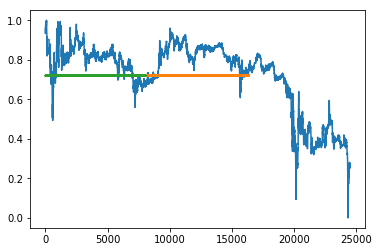

[[        nan]
 [ 0.71927607]
 [ 0.71927118]
 ..., 
 [        nan]
 [        nan]
 [        nan]]
[[ 0.71927607]
 [ 0.71927118]
 [ 0.72134209]
 ..., 
 [ 0.72232336]
 [ 0.71899426]
 [ 0.71973658]]


In [83]:
# shift train predictions for plotting
#dataset = dataset.reshape(len(dataset), 1)
#print dataset.shape
trainPredictPlot = numpy.empty_like(dataset)
print trainPredictPlot.shape
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredict)
plt.plot(testPredict)
plt.show()
print trainPredictPlot
print trainPredict